<a href="https://colab.research.google.com/github/namita0210/ML-Models/blob/main/lda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
pip install Faker


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 29.1 MB/s eta 0:00:00


In [5]:
!pip install pyLDAvis

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 17.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 106.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.6/346.6 kB 40.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires python-multipart, which is not installed.
lida 0.0.10 requires uvico

In [6]:
# import libraries
import pandas as pd
import nltk
import random
from faker import Faker
import re
import string
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize
nltk.download('punkt')
from gensim import corpora
from gensim.models import LdaModel
from gensim import models
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
#generate data from prompt
# Initialize the Faker generator
faker = Faker()

# List of possible application options
app_options = ["slack", "ppt", "one drive", "share point"]

# List of made-up problems
problem_descriptions = [
    "Messages are not syncing properly in Slack.",
    "PowerPoint application crashes when adding animations.",
    "Files are not syncing to One Drive from certain devices.",
    "SharePoint Online is inaccessible for some users.",
    "Slack notifications are delayed.",
    "PPT slides are not saving correctly, causing data loss.",
    "One Drive files are getting duplicated without reason.",
    "Permissions are not working as expected in SharePoint.",
    "Slack app freezes on startup.",
    "Font formatting is inconsistent in PowerPoint.",
    "One Drive is not showing the latest changes made to files.",
    "SharePoint search functionality is returning incorrect results.",
    "Slack channels are not loading for some users.",
    "PPT crashes when inserting audio or video.",
    "Files uploaded to One Drive are missing metadata.",
    "SharePoint lists are not updating in real-time.",
    "Slack messages are disappearing from certain channels.",
    "PowerPoint slides do not display correctly in full-screen mode.",
    "One Drive is not syncing offline changes.",
    "SharePoint document version history is not accurate.",
    "Slack app is using excessive memory, slowing down the system.",
    "PPT presenter view is not working as expected.",
    "Files uploaded to One Drive cannot be opened by others.",
    "SharePoint alerts are not being received by users.",
    "Slack file sharing is not working consistently.",
    "PowerPoint slides are pixelated when presented.",
    "One Drive mobile app crashes upon opening.",
    "SharePoint permissions are not applying to subfolders.",
    "Slack notifications are not being delivered to mobile devices.",
    "PPT animations are not playing during the slideshow."
]

# Generate a list of 30 dictionaries with random problems and other fixed values
data = []
for _ in range(30):
    app = random.choice(app_options)
    description = random.choice(problem_descriptions)
    description += f" More information can be found at {faker.url()}."  # Placeholder URL
    description += f" Contact us at {faker.email()} for assistance."  # Placeholder email ID
    data.append({
        "number": "INC3422521",
        "ci": app,
        "week_start_date": "2023-05-15",
        "description": description
    })



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
df = pd.DataFrame(data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,number,ci,week_start_date,description
0,INC3422521,slack,2023-05-15,PPT animations are not playing during the slid...
1,INC3422521,ppt,2023-05-15,PowerPoint slides are pixelated when presented...
2,INC3422521,share point,2023-05-15,SharePoint permissions are not applying to sub...
3,INC3422521,ppt,2023-05-15,Files uploaded to One Drive cannot be opened b...
4,INC3422521,one drive,2023-05-15,One Drive mobile app crashes upon opening. Mor...


In [18]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
nltk.download('stopwords')

# Define your own list of stopwords if needed
# stopwords = ['list', 'of', 'your', 'stop', 'words']

def cleanData(text):
    # Remove URLs
    url_pattern = re.compile(r'https?://\S+')
    text_without_url = url_pattern.sub('', text)

    # Remove email ids
    email_pattern = re.compile(r'\b[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Z|a-z]{2,}\b')
    text_without_email = email_pattern.sub('', text_without_url)

    # Remove punctuation
    text_wo_punctuation = re.sub(r'[^\w\s]', '', text_without_email)

    # Remove whitespaces
    text_wo_whitespaces = re.sub(r' +', ' ', text_wo_punctuation).strip()

    # Lowercase
    text_lowercase = text_wo_whitespaces.lower()

    # Remove stopwords using NLTK stopwords
    stop_words = set(stopwords.words('english'))
    words = text_lowercase.split()
    text_wo_stopwords = ' '.join(word for word in words if word not in stop_words)

    return text_wo_stopwords

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [19]:
# APply clean function to the dataframe column
df['cleanDescription'] = df['description'].apply(cleanData)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


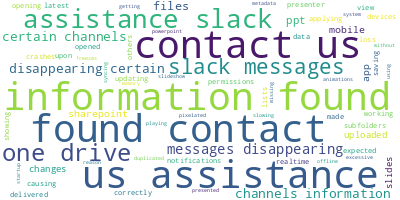

In [20]:
# Visualize
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df['cleanDescription'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [21]:
#Make tokens
df['tokens'] = df['cleanDescription'].apply(word_tokenize)

# Create a dictionary from the tokenized text
dictionary = corpora.Dictionary(df['tokens'])

# Create a corpus
corpus = [dictionary.doc2bow(text) for text in df['tokens']]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [22]:

# Train an LDA model on the corpus
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=5, passes=15)

# Print the topics and associated words
topics = lda_model.print_topics(num_words=10)
for topic in topics:
    print(topic)


(0, '0.073*"contact" + 0.073*"found" + 0.073*"information" + 0.073*"us" + 0.073*"assistance" + 0.038*"slides" + 0.038*"ppt" + 0.038*"mobile" + 0.038*"slack" + 0.038*"loss"')
(1, '0.014*"assistance" + 0.014*"information" + 0.014*"contact" + 0.014*"us" + 0.014*"found" + 0.014*"slack" + 0.014*"slides" + 0.014*"metadata" + 0.014*"missing" + 0.014*"startup"')
(2, '0.014*"assistance" + 0.014*"contact" + 0.014*"found" + 0.014*"us" + 0.014*"information" + 0.014*"slack" + 0.014*"slides" + 0.014*"metadata" + 0.014*"missing" + 0.014*"slideshow"')
(3, '0.062*"contact" + 0.062*"assistance" + 0.062*"found" + 0.062*"us" + 0.062*"information" + 0.058*"uploaded" + 0.049*"files" + 0.046*"one" + 0.046*"drive" + 0.040*"not"')
(4, '0.094*"information" + 0.094*"us" + 0.094*"found" + 0.094*"assistance" + 0.094*"contact" + 0.033*"slack" + 0.029*"disappearing" + 0.029*"channels" + 0.029*"certain" + 0.029*"messages"')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [23]:
# Evaluation metric
perplexity = lda_model.log_perplexity(corpus)
print('Perplexity: ', perplexity)

Perplexity:  -4.098515664286252


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


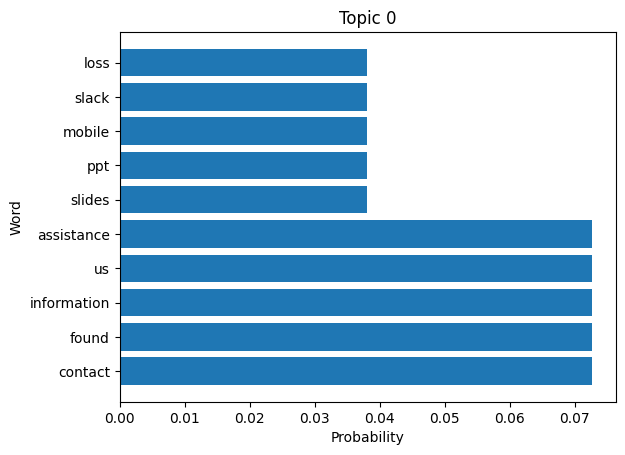

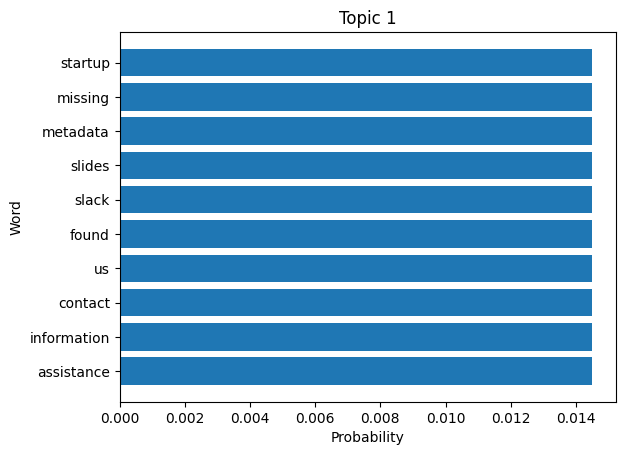

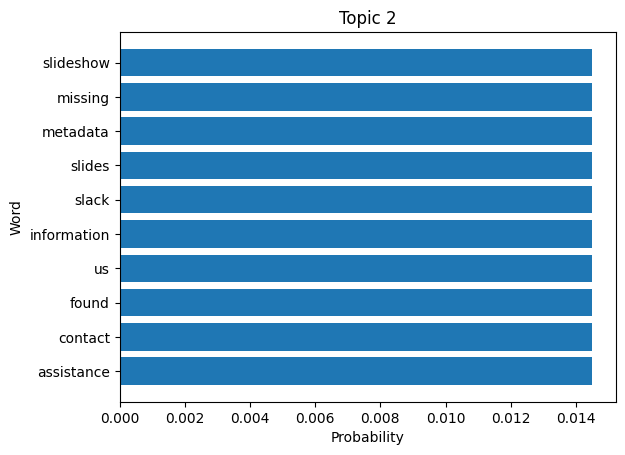

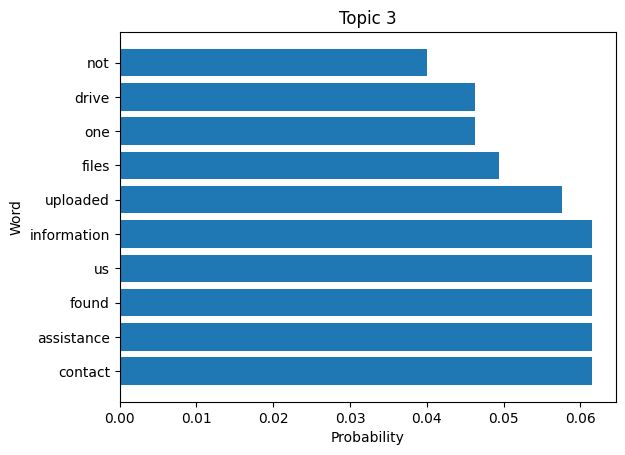

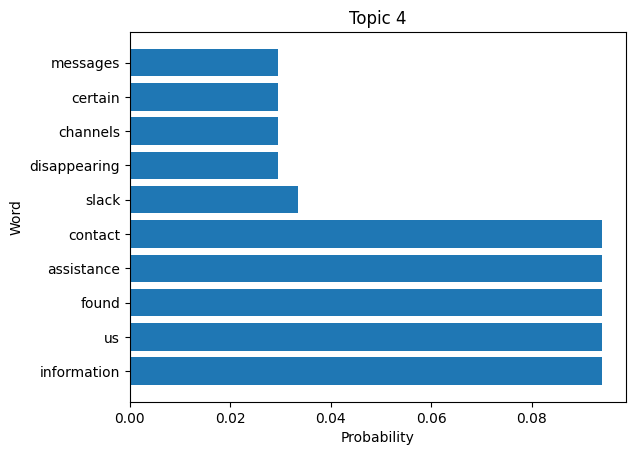

In [27]:
#Visualize
import matplotlib.pyplot as plt
import pyLDAvis.gensim as gensimvis
import gensim

topics = lda_model.show_topics(num_topics=5, num_words=10, formatted=False)
for topic_id, topic in topics:
    words = [word for word, prob in topic]
    probs = [prob for word, prob in topic]
    plt.barh(words, probs)
    plt.title(f"Topic {topic_id}")
    plt.xlabel("Probability")
    plt.ylabel("Word")
    plt.show()

